In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Dropout, Flatten, Embedding,Reshape,TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from keras import layers
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img_dir = '/kaggle/input/persian-alphabets-and-numbers/data/data'
df=pd.read_csv('/kaggle/input/persian-alphabets-and-numbers/labels.csv')
label=df['Label']

In [3]:
target_size = (50, 50)
images = []

for i in range(len(df)):
    img_dir = f'/kaggle/input/persian-alphabets-and-numbers/data/data/{i}.png'
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    images.append(binary_image)

In [4]:
len(images)

43344

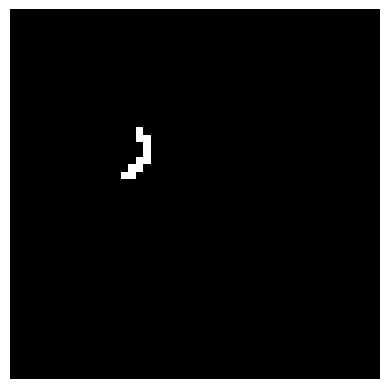

ر


In [5]:
plt.imshow(cv2.cvtColor(images[2542], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(label[2542])

<Axes: xlabel='Label'>

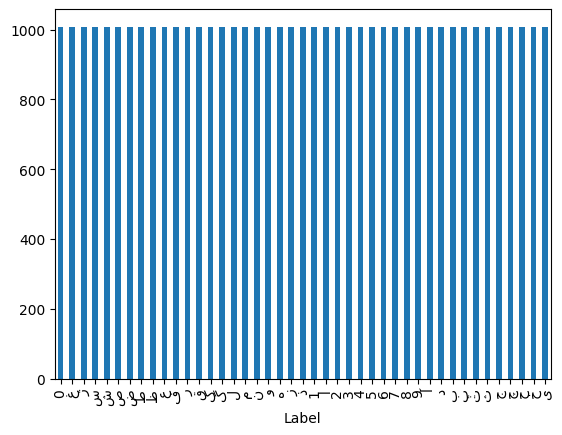

In [6]:
df['Label'].value_counts().plot(kind='bar')

In [7]:
label_mapping = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'ا': 10, 'آ': 11, 'ب': 12, 'پ': 13, 'ت': 14, 'ث': 15, 'ج': 16, 'چ': 17, 'ح': 18, 'خ': 19,
    'د': 20, 'ذ': 21, 'ر': 22, 'ز': 23, 'ژ': 24, 'س': 25, 'ش': 26, 'ص': 27, 'ض': 28, 'ط': 29,
    'ظ': 30, 'ع': 31, 'غ': 32, 'ف': 33, 'ق': 34, 'ک': 35, 'گ': 36, 'ل': 37, 'م': 38, 'ن': 39,
    'و': 40, 'ه': 41, 'ی': 42
}

numeric_labels = np.array([label_mapping[label] for label in label])

In [8]:
numeric_labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [9]:
print(label[1523])
print(numeric_labels[1523])

پ
13


In [10]:
one_hot_labels = to_categorical(numeric_labels)
print("Shape of One-Hot Encoded Labels:", one_hot_labels.shape)

Shape of One-Hot Encoded Labels: (43344, 43)


In [11]:
from sklearn.utils import shuffle

imgs, OHL = shuffle(images, one_hot_labels, random_state=42)

7


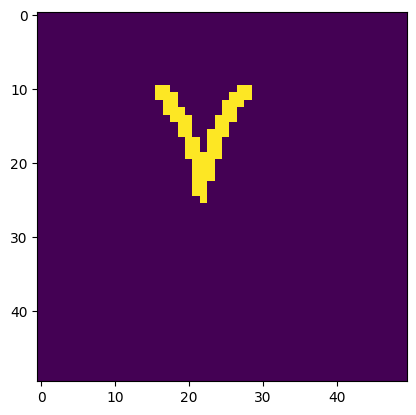

In [12]:
plt.imshow(imgs[1516])
print(np.argmax(OHL[1516]))

In [13]:
imgs2=imgs.copy()

In [14]:
imgs=np.expand_dims(imgs,axis=-1)
imgs = np.array(imgs)
imgs = imgs / 255.0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(imgs, OHL, test_size=0.2, random_state=42,shuffle=False)

In [16]:
from tensorflow import keras
NN = keras.Sequential()
NN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50,50,1)))
NN.add(layers.MaxPooling2D((2, 2)))
NN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
NN.add(layers.MaxPooling2D((2, 2)))
NN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
NN.add(layers.MaxPooling2D((2, 2)))
NN.add(Flatten())
NN.add(Dense(64,activation='relu'))
NN.add(Dense(128,activation='relu'))
NN.add(Dense(len(label.unique()),activation='softmax'))

In [17]:
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = NN.fit(X_train, y_train, epochs=15, batch_size=32,
                         validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/15
1084/1084 [==============================] - 14s 5ms/step - loss: 1.3948 - accuracy: 0.5724 - val_loss: 0.6661 - val_accuracy: 0.7798
Epoch 2/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.5478 - accuracy: 0.8247 - val_loss: 0.6395 - val_accuracy: 0.8004
Epoch 3/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.4143 - accuracy: 0.8662 - val_loss: 0.4334 - val_accuracy: 0.8716
Epoch 4/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.3030 - accuracy: 0.8984 - val_loss: 0.4456 - val_accuracy: 0.8639
Epoch 5/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.2603 - accuracy: 0.9149 - val_loss: 0.4775 - val_accuracy: 0.8669
Epoch 6/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.2514 - accuracy: 0.9220 - val_loss: 0.5005 - val_accuracy: 0.8822
Epoch 7/15
1084/1084 [==============================] - 5s 5ms/step - loss: 0.2234 - accuracy: 0.9301 - val_loss: 0.3796 - val_accuracy

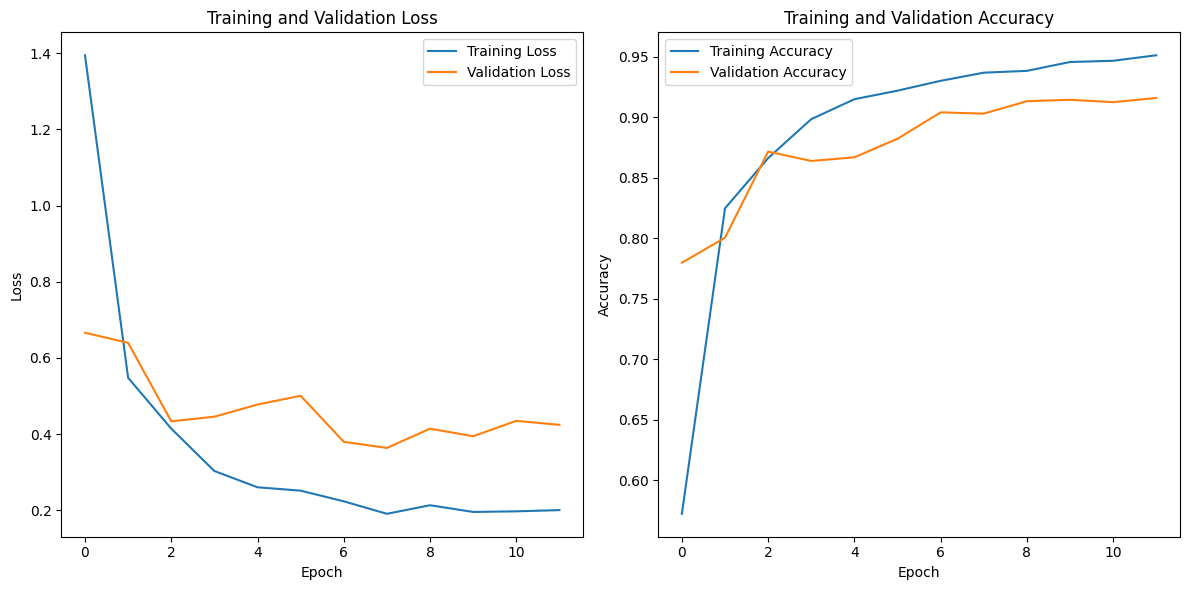

In [19]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

****Test The Model****

In [20]:
predictions=NN.predict(X_test,32)

271/271 [==============================] - 1s 2ms/step


In [21]:
print(np.argmax(predictions[48]))
print(np.argmax(y_test[48]))

1
1


In [22]:
print(np.argmax(predictions[12]))
print(np.argmax(y_test[12]))

2
2


In [23]:
persian_alphabet = ['ا', 'آ', 'ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ل', 'م', 'ن', 'و', 'ه', 'ی']
persian_alphabet = [str(i) for i in range(10)] + persian_alphabet

In [24]:
persian_alphabet[np.argmax(y_test[48])]

'1'

In [25]:
NN.evaluate(X_test,y_test)

271/271 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.9030


[0.36362746357917786, 0.9029876589775085]

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=persian_alphabet))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       199
           1       0.76      0.91      0.82       197
           2       0.86      0.92      0.89       213
           3       0.94      0.86      0.90       186
           4       0.83      0.94      0.88       193
           5       0.88      0.74      0.80       191
           6       0.95      0.88      0.92       214
           7       0.91      0.98      0.94       224
           8       0.96      0.98      0.97       203
           9       0.98      0.92      0.95       196
           ا       0.90      0.75      0.82       222
           آ       0.96      0.95      0.95       189
           ب       0.96      0.87      0.91       221
           پ       0.90      0.96      0.93       212
           ت       0.88      0.93      0.90       199
           ث       0.95      0.89      0.92       213
           ج       0.84      0.67      0.75       190
           چ       0.81    

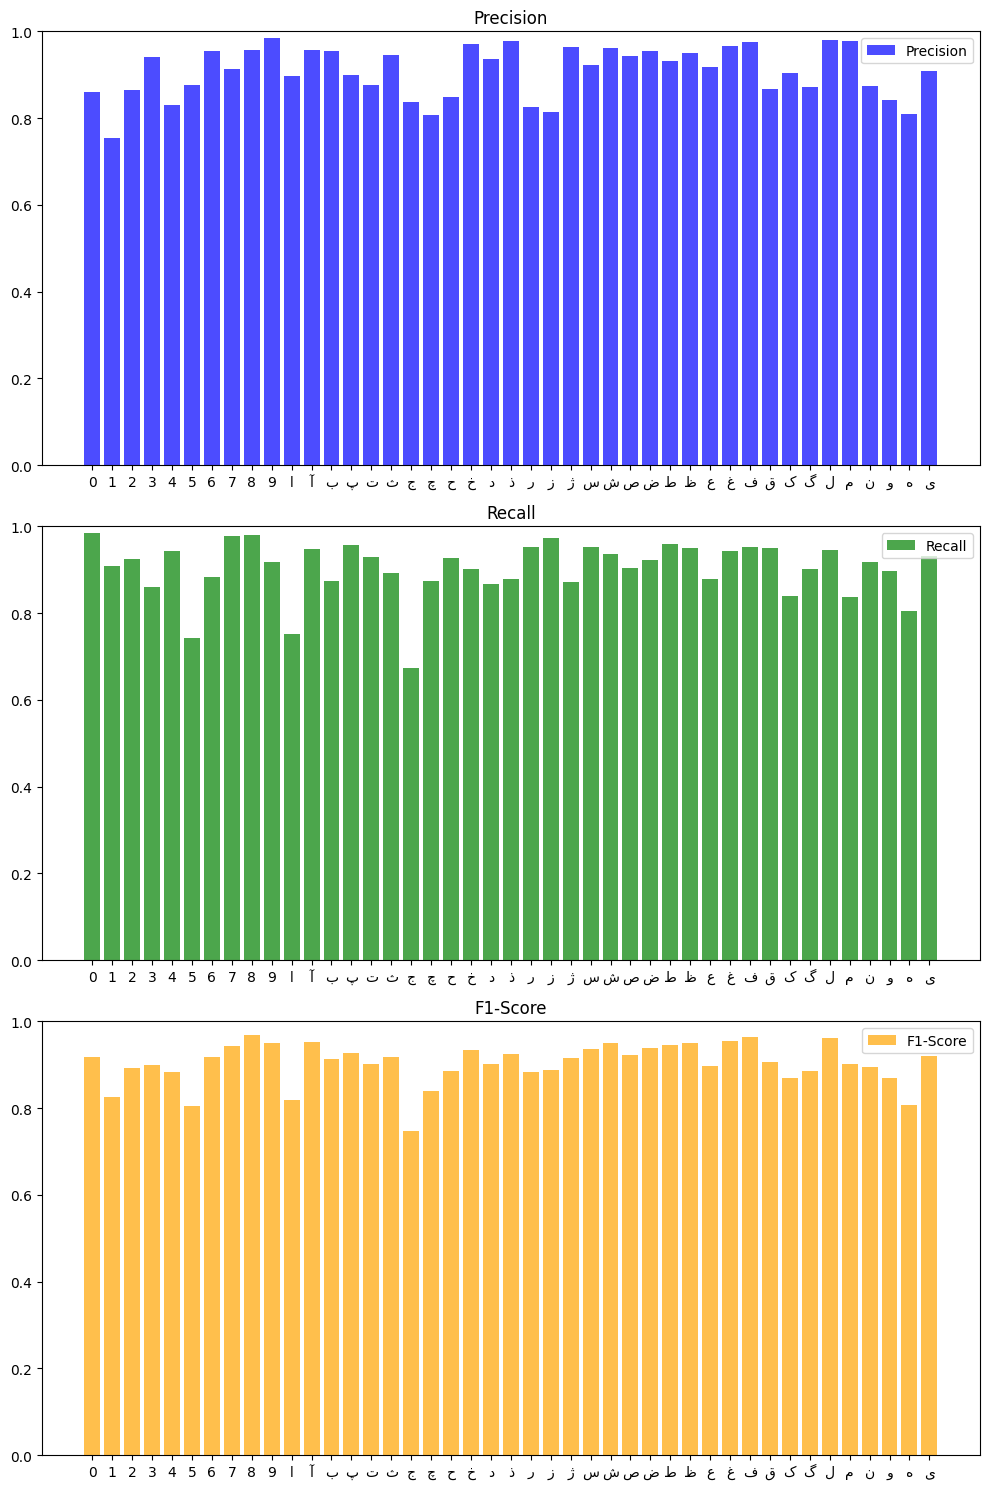

In [27]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.argmax(axis=1), predictions.argmax(axis=1))
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               'ا', 'آ', 'ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ',
               'د', 'ذ', 'ر', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط',
               'ظ', 'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ل', 'م', 'ن',
               'و', 'ه', 'ی']
axes[0].bar(class_names, precision, color='blue', alpha=0.7, label='Precision')
axes[0].set_title('Precision')
axes[0].set_ylim([0, 1])
axes[0].legend()


axes[1].bar(class_names, recall, color='green', alpha=0.7, label='Recall')
axes[1].set_title('Recall')
axes[1].set_ylim([0, 1])
axes[1].legend()

axes[2].bar(class_names, f1_score, color='orange', alpha=0.7, label='F1-Score')
axes[2].set_title('F1-Score')
axes[2].set_ylim([0, 1])
axes[2].legend()

plt.tight_layout()
plt.show()

In [30]:
NN.save('ocr-NN',save_format='h5')
NN.save('ocr-NN.h5')


In [31]:
from IPython.display import FileLink
FileLink(r'ocr-NN.h5')

/kaggle/working/ocr-NN.h5